In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# CSV 읽기

In [2]:
df = pd.read_csv("winning_rate_KBO.csv")

In [3]:
df.head()

,year,team,run_o,run_d,win,lose
0,1982,MBC,419,350,46,34
1,1982,삼성,429,257,54,26
2,1982,OB,399,318,56,24
3,1982,해태,374,388,38,42
4,1982,롯데,353,385,31,49


# 승률 및 피타고리안 승률을 열에 추가

In [4]:
df["winning_rate"] = df["win"]/(df["win"]+df["lose"])
# 실제 승률. 승률 계산에서 무승부는 제외한다. 현재 KBO의 승률 계산법을 일괄적으로 적용
df["Pythagorean1"] = pow(df["run_o"], 2)/(pow(df["run_o"], 2) + pow(df["run_d"], 2))          # 피타고리안 승률 1
df["Pythagorean2"] = pow(df["run_o"], 1.83)/(pow(df["run_o"], 1.83) + pow(df["run_d"], 1.83)) # 피타고리안 승률 2

피타고리안 승률 계산은 두 가지
- 첫 번째는 통상적인 피타고리안 승률 계산법
- 두 번째는 베이스볼 레퍼런스에서 사용하는 지수(1.83)를 적용한 피타고리안 승률 계산법

In [5]:
df.head()

,year,team,run_o,run_d,win,lose,winning_rate,Pythagorean1,Pythagorean2
0,1982,MBC,419,350,46,34,0.5750,0.589010,0.581586
1,1982,삼성,429,257,54,26,0.6750,0.735899,0.718626
2,1982,OB,399,318,56,24,0.7000,0.611547,0.602345
3,1982,해태,374,388,38,42,0.4750,0.481633,0.483193
4,1982,롯데,353,385,31,49,0.3875,0.456721,0.460384


# 데이터를 추가한 테이블을 CSV로 저장

In [6]:
df.to_csv("winning_rate_KBO2.csv")

# SEABORN을 이용해 그래프로 표현

scatter plot 뿐만 아니라 회귀분석 그래프와 피어슨 상관계수를 같이 나타냄

In [7]:
sns.set()

In [8]:
sns.set_style("whitegrid")

C:\Dev\Python\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Dev\Python\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


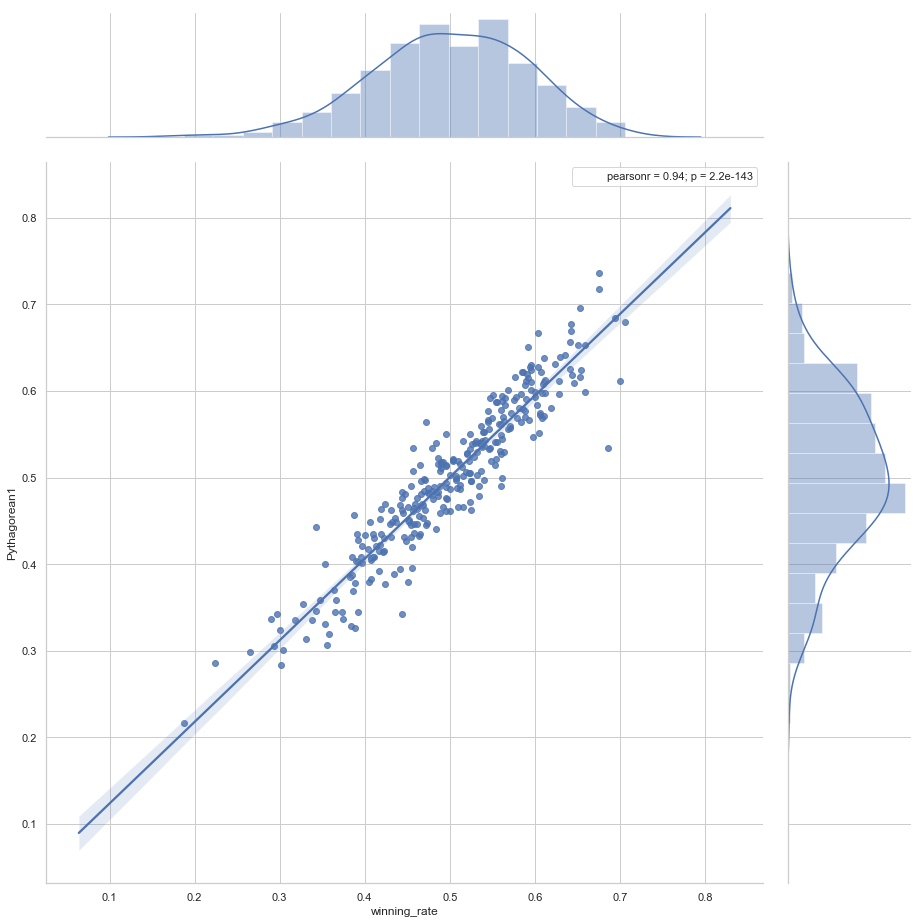

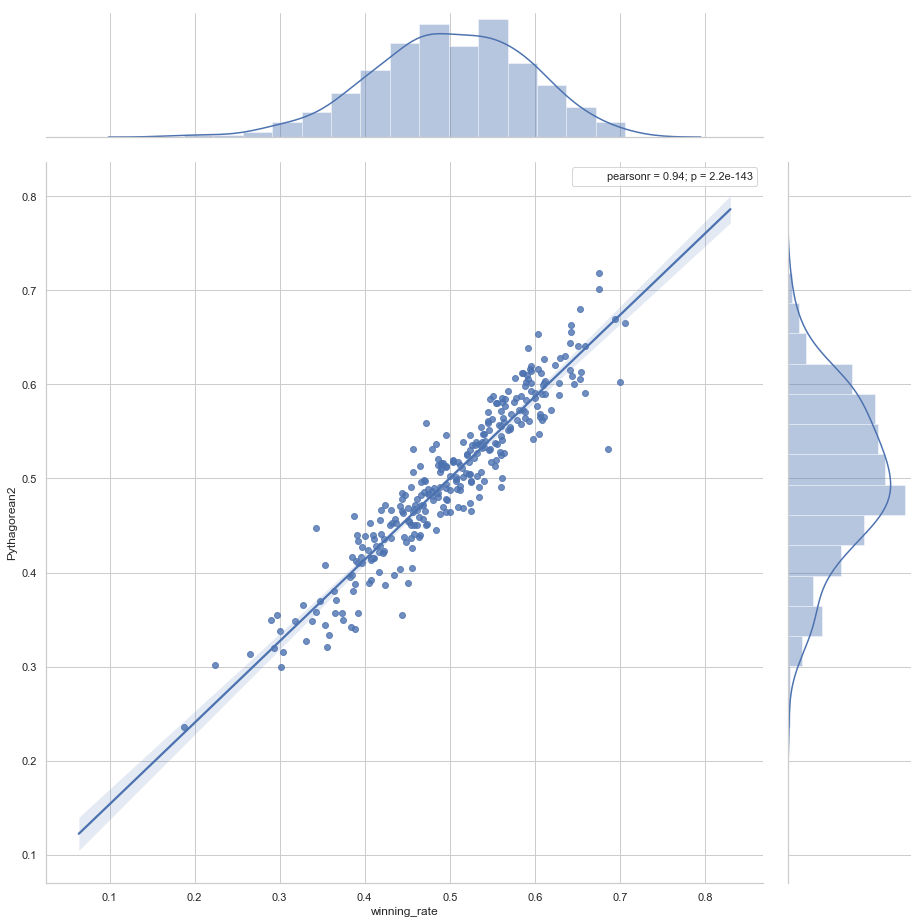

In [9]:
sns.jointplot(x="winning_rate", y="Pythagorean1", data=df, kind="reg", height=13, stat_func=stats.pearsonr)
sns.jointplot(x="winning_rate", y="Pythagorean2", data=df, kind="reg", height=13, stat_func=stats.pearsonr)

실제 승률과 피타고리안 승률은 피어슨 상관계수 0.94로 상당히 높은 상관관계를 가진다.